In [ ]:
#MNIST
#importa los datasets
from sklearn import datasets

#Cambio de prueba

In [3]:
#Se cargan el dataset de digitos
digits =  datasets.load_digits()
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
print(digits.feature_names)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [6]:
digits.data.shape

(1797, 64)

In [7]:
digits.target.shape

(1797,)

In [8]:
import matplotlib.pyplot as plt

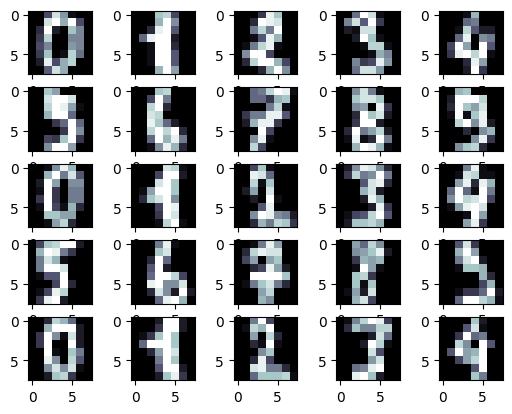

In [9]:
fig, ax = plt.subplots(5,5)
for i, axi in enumerate(ax.flat):
  axi.imshow(digits.images[i], cmap='bone')

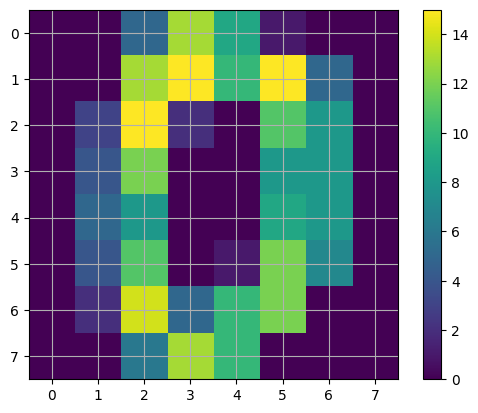

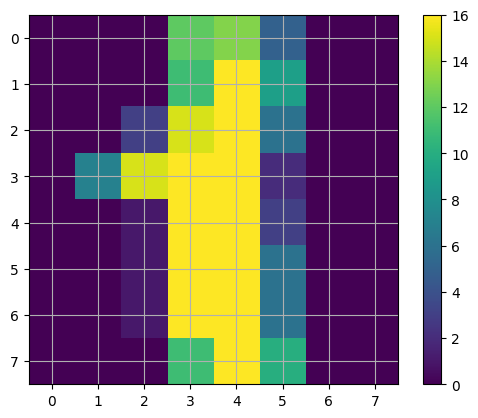

In [10]:
plt.figure()
for i in range(0,2):
  plt.imshow(digits.images[i])
  plt.colorbar()
  plt.grid(True)
  plt.show()

In [11]:
# se importa el modelo y particiona el dataset
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [12]:
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, stratify=digits.target, random_state=42)

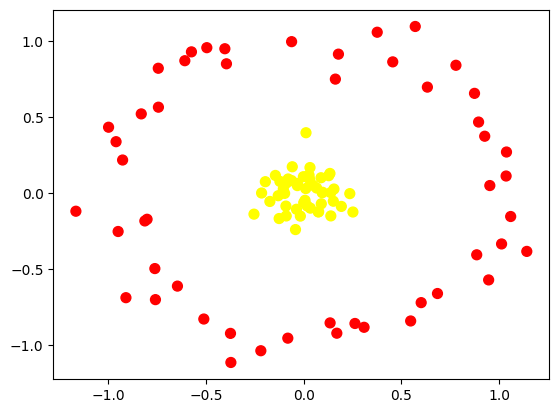

In [13]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
X,y = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

In [16]:
#cuadratica
r = (X ** 2).sum(1) #polynomial

In [19]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data=[go.Scatter3d(
    x=X[:, 0],
    y=X[:, 1],
    z=r,
    mode='markers',
    marker=dict(
        size=12,
        color=y,    #set color to an array/list of disired values
        colorscale='viridis',   #choose a colorscale
        opacity=0.8
    )
)])

#tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [20]:
#Gaussiana

r = np.exp(-(X ** 2).sum(1))

In [21]:

fig = go.Figure(data=[go.Scatter3d(
    x=X[:, 0],
    y=X[:, 1],
    z=r,
    mode='markers',
    marker=dict(
        size=12,
        color=y,    #set color to an array/list of disired values
        colorscale='viridis',   #choose a colorscale
        opacity=0.8
    )
)])

#tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [22]:
#Create the SVM model
classifier = SVC(kernel = 'linear', random_state = 0)


In [23]:
#Entrenar el modelo   Fit the model for the data
classifier.fit(Xtrain, ytrain)

SVC(kernel='linear', random_state=0)

In [24]:
y_pred = classifier.predict(Xtest)
y_pred

array([1, 0, 9, 1, 5, 6, 7, 9, 1, 5, 5, 9, 2, 2, 7, 6, 5, 4, 8, 6, 9, 4,
       0, 6, 0, 1, 2, 0, 4, 7, 3, 3, 8, 7, 4, 6, 5, 1, 5, 5, 4, 0, 8, 8,
       5, 8, 4, 3, 0, 7, 2, 5, 1, 2, 1, 1, 4, 4, 9, 5, 2, 5, 4, 9, 0, 2,
       4, 1, 7, 9, 6, 1, 8, 5, 4, 3, 4, 4, 3, 6, 1, 0, 1, 2, 3, 7, 7, 2,
       9, 6, 5, 8, 2, 6, 7, 5, 9, 7, 0, 5, 0, 1, 1, 9, 2, 4, 6, 5, 1, 0,
       0, 9, 7, 8, 4, 2, 8, 4, 1, 4, 0, 0, 7, 5, 7, 1, 3, 9, 2, 7, 2, 6,
       9, 7, 0, 0, 1, 6, 3, 5, 1, 6, 0, 9, 6, 7, 4, 1, 6, 6, 7, 5, 8, 8,
       3, 4, 4, 9, 0, 2, 9, 0, 9, 6, 0, 7, 6, 4, 4, 6, 7, 7, 4, 6, 9, 7,
       4, 3, 5, 2, 0, 8, 4, 5, 8, 3, 5, 7, 8, 3, 9, 8, 6, 2, 9, 4, 2, 1,
       9, 9, 6, 9, 2, 5, 1, 0, 8, 3, 0, 4, 4, 5, 5, 3, 3, 6, 3, 1, 0, 6,
       7, 1, 6, 9, 6, 3, 2, 3, 0, 7, 8, 1, 5, 5, 9, 3, 4, 2, 1, 6, 9, 3,
       9, 5, 2, 2, 3, 5, 6, 0, 4, 2, 2, 8, 8, 1, 3, 0, 9, 6, 8, 0, 3, 3,
       1, 1, 4, 8, 8, 9, 1, 7, 6, 2, 1, 0, 2, 3, 9, 7, 7, 7, 9, 2, 5, 9,
       5, 7, 3, 5, 9, 7, 1, 8, 0, 4, 2, 3, 1, 7, 2,

In [25]:
#matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, y_pred)

array([[44,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0, 44,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 46,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 45,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 45,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 45,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  3,  0,  0,  0,  1,  1,  1, 37,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2, 43]])

In [26]:
#exactitud
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_pred)

0.9755555555555555

In [28]:
#Se puede hacer la predicción con clase
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(ytest, y_pred)

array([[[405,   0],
        [  1,  44]],

       [[401,   3],
        [  1,  45]],

       [[406,   0],
        [  0,  44]],

       [[404,   0],
        [  0,  46]],

       [[404,   1],
        [  0,  45]],

       [[403,   1],
        [  1,  45]],

       [[404,   1],
        [  0,  45]],

       [[404,   1],
        [  0,  45]],

       [[405,   2],
        [  6,  37]],

       [[403,   2],
        [  2,  43]]])